imports

In [1]:
from typing import *
from langgraph.graph import StateGraph, START, END

from IPython.display import Image,display
import random

In [2]:
class AgentState(TypedDict):
    number: int
    guess: int
    counter: int
    low_limit: int
    high_limit: int

In [3]:
SUCCESS_MSG = "you have succeeded to crack this game! well done lil bro"
TRY_AGAIN_MSG = "try again dawg, today wasn't your day"

In [4]:
def setup_node(state: AgentState) -> AgentState:
    """
    sets the guessing game, bounds are [1,20] where both numbers are range inclusive
    max number of guesses is 7, if suceeded before it SUCCESS_MSG should appear else TRY_AGAIN_MSG should occur
    """
    state["number"] = random.randint(1, 20)
    state["counter"] = 0
    state["low_limit"] = 1
    state["high_limit"] = 20
    return state

def guess_node(state: AgentState) -> AgentState:
    """
    this node makes a guess each time to match with the required value which is defined as 'number' in this case.
    guess is made randomly each time till counter reaches 7.
    """

    state["guess"] = random.randint(state["low_limit"], state["high_limit"])
    state["counter"] += 1
    return state

def hint_node(state: AgentState) -> AgentState:
    """
    gives hint to guess node each time it is away from the desired number,
    if guess is higher than desired number, high_limit is capped to current guess
    if guess is lower than desired number, low_limit is capped to current guess
    guesses are made till guess == desired number in which success message should be printed
    """

    if state["guess"] > state["number"]:
        state["high_limit"] = state["guess"] - 1  
    elif state["guess"] < state["number"]:
        state["low_limit"] = state["guess"] + 1  
    return state  

def should_continue(state: AgentState) -> str:  
    """
    determines termination condition till number of guesses run out.
    """
    
    if state["guess"] == state["number"]:
        print(SUCCESS_MSG)
        return "exit"
    elif state["counter"] < 7:
        print(f"Guess: {state['guess']} (Attempt {state['counter']}/7)")
        return "continue"
    else:
        print(TRY_AGAIN_MSG, f"Number was {state['number']}")
        return "exit"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint", hint_node)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")

graph.add_conditional_edges(
    "hint",              
    should_continue,    
    {
        "continue": "guess",
        "exit": END,
    },
)

app = graph.compile()

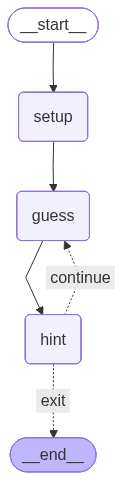

In [6]:
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
result = app.invoke({
    "number": 0,           
    "guess": 0,
    "counter": 0,
    "low_limit": 1,
    "high_limit": 20
})
print(result)

you have succeeded to crack this game! well done lil bro
{'number': 15, 'guess': 15, 'counter': 1, 'low_limit': 1, 'high_limit': 20}
